In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import queue

Le degrés maximal, d'un graphe est le nombre maximal d'arrete d'un noeud.

Entrée : un graphe non orienté sans cycles G=(S,A)

Sortie : une fonction de coloration des sommets de G

delta := degré maximal du graphe + 1 (cf Théorème de Brooks)

Pour c allant de delta à 1

 Pour chaque combinaison possible w de c couleurs de longueur |S|

 Si coloration(w, G) == Vrai

 Retourner w

Retourner Faux

Degré maximal (Δ) : 5
Nombre d'arêtes : 20
Coloration trouvée : {0: 0, 1: 1, 2: 2, 3: 0, 4: 1, 5: 2, 6: 0, 7: 1, 8: 2, 9: 0}
Nombre de couleurs utilisées : 3


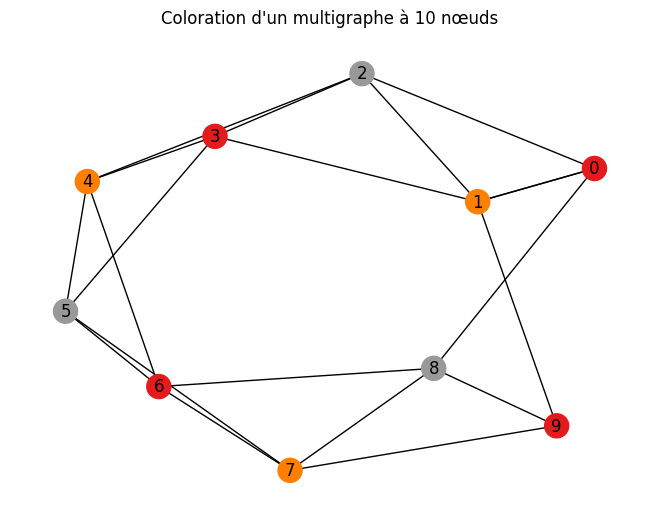

In [50]:
import networkx as nx
import itertools
import matplotlib.pyplot as plt

# Fonction pour vérifier si une coloration est valide
def is_valid_coloring(graph, coloring):
    """
    Vérifie si deux sommets adjacents n'ont pas la même couleur.
    Entrée : graphe (networkx), coloration (dict : sommet -> couleur)
    Sortie : True si valide, False sinon
    """
    for u, v in graph.edges():
        if coloring[u] == coloring[v]:
            return False
    return True

# Algorithme naïf de coloration
def naive_coloring(graph):
    """
    Algorithme naïf qui teste toutes les combinaisons de couleurs possibles.
    Entrée : graphe non orienté (networkx)
    Sortie : dictionnaire de coloration (sommet -> couleur) ou False si échec
    """
    n = len(graph.nodes())  # Nombre de sommets
    delta = max(dict(graph.degree()).values())  # Degré maximal
    max_colors = delta + 1  # Borne supérieure (Théorème de Brooks)

    # Tester chaque nombre de couleurs de max_colors à 1
    for c in range(max_colors, 0, -1):
        colors = range(c)  # Liste des couleurs possibles : 0, 1, ..., c-1
        # Générer toutes les combinaisons possibles de c couleurs pour n sommets
        for coloring_tuple in itertools.product(colors, repeat=n):
            # Convertir le tuple en dictionnaire {sommet: couleur}
            coloring_dict = dict(enumerate(coloring_tuple))
            if is_valid_coloring(graph, coloring_dict):
                return coloring_dict  # Retourner la première coloration valide
    return False  # Aucune coloration trouvée

# Visualisation de la coloration
def visualize_coloring(graph, coloring, title="Coloration du graphe"):
    pos = nx.spring_layout(graph)
    colors = [coloring[node] for node in graph.nodes()]
    nx.draw(graph, pos, node_color=colors, with_labels=True, cmap=plt.cm.Set1)
    plt.title(title)
    plt.show()

# Création d'un multigraphe avec 10 nœuds et plusieurs arêtes
if __name__ == "__main__":
    G = nx.MultiGraph()
    # Ajouter 10 nœuds (0 à 9)
    G.add_nodes_from(range(10))
    # Ajouter des arêtes, dont plusieurs entre certains sommets
    edges = [
        (0, 1), (0, 1), (0, 2),  # Deux arêtes entre 0 et 1
        (1, 2), (1, 3),
        (2, 3), (2, 4),
        (3, 4), (3, 5),
        (4, 5), (4, 6),
        (5, 6), (5, 7),
        (6, 7), (6, 8),
        (7, 8), (7, 9),
        (8, 9), (8, 0), (9, 1)  # Ajouter quelques cycles
    ]
    G.add_edges_from(edges)


    # Calculer le degré maximal
    degrees = dict(G.degree())
    delta = max(degrees.values())
    print(f"Degré maximal (Δ) : {delta}")
    print(f"Nombre d'arêtes : {G.number_of_edges()}")

    # Appliquer l'algorithme naïf
    coloring = naive_coloring(G)
    
    if coloring:
        print("Coloration trouvée :", coloring)
        print(f"Nombre de couleurs utilisées : {len(set(coloring.values()))}")
        visualize_coloring(G, coloring, "Coloration d'un multigraphe à 10 nœuds")
    else:
        print("Aucune coloration trouvée.")

In [3]:
import itertools

# Liste des arêtes
edges = [
    (0, 1), (0, 1), (0, 2),  # Deux arêtes entre 0 et 1
    (1, 2), (1, 3),
    (2, 3), (2, 4),
    (3, 4), (3, 5),
    (4, 5), (4, 6),
    (5, 6), (5, 7),
    (6, 7), (6, 8),
    (7, 8), (7, 9),
    (8, 9), (8, 0), (9, 1)
]

nodes = range(10)

# Vérifie si la coloration est valide
def coloration(w, edges):
    for u, v in edges:
        if w[u] == w[v]:  # Si deux sommets adjacents ont la même couleur
            return False
    return True

# Calcule le degré maximum du graphe
def degrees_max(A):
    dic = {}
    for ar in A:
        dic[ar[0]] = dic.get(ar[0], 0) + 1
        dic[ar[1]] = dic.get(ar[1], 0) + 1
    return max(dic.values())

# Algorithme naïf pour trouver une coloration pour chaque c
def naif(S, A):
    delta = degrees_max(A)
    n = len(S)
    solutions = {}  # Dictionnaire pour stocker les solutions par nombre de couleurs
    
    # Tester les nombres de couleurs de delta+1 à 1
    for c in range(delta + 1, 0, -1):
        print(f"Test avec {c} couleurs...")
        couleur = range(c)
        # Générer toutes les combinaisons possibles de couleurs pour les nœuds
        for w in itertools.product(couleur, repeat=n):
            if coloration(w, edges):
                print(f"Coloration valide trouvée avec {c} couleurs : {w}")
                solutions[c] = w  # Stocker la première solution trouvée
                break  # Passer au c suivant
        else:
            print(f"Aucune coloration valide trouvée avec {c} couleurs.")
    
    if solutions:
        print("\nRésumé des solutions trouvées :")
        for c, w in solutions.items():
            print(f"{c} couleurs : {w}")
        return solutions
    else:
        print("Aucune coloration valide trouvée pour aucun nombre de couleurs.")
        return None

# Exécuter l'algorithme
result = naif(nodes, edges)

Test avec 6 couleurs...
Coloration valide trouvée avec 6 couleurs : (0, 1, 2, 0, 1, 2, 0, 1, 2, 0)
Test avec 5 couleurs...
Coloration valide trouvée avec 5 couleurs : (0, 1, 2, 0, 1, 2, 0, 1, 2, 0)
Test avec 4 couleurs...
Coloration valide trouvée avec 4 couleurs : (0, 1, 2, 0, 1, 2, 0, 1, 2, 0)
Test avec 3 couleurs...
Coloration valide trouvée avec 3 couleurs : (0, 1, 2, 0, 1, 2, 0, 1, 2, 0)
Test avec 2 couleurs...
Aucune coloration valide trouvée avec 2 couleurs.
Test avec 1 couleurs...
Aucune coloration valide trouvée avec 1 couleurs.

Résumé des solutions trouvées :
6 couleurs : (0, 1, 2, 0, 1, 2, 0, 1, 2, 0)
5 couleurs : (0, 1, 2, 0, 1, 2, 0, 1, 2, 0)
4 couleurs : (0, 1, 2, 0, 1, 2, 0, 1, 2, 0)
3 couleurs : (0, 1, 2, 0, 1, 2, 0, 1, 2, 0)
